# Chapter py_11 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
import pandas as pd
import statsmodels.formula.api as smf

housing = pd.read_csv("boston-housing.csv")
formula = "MEDV ~ CRIM + RM"
model = smf.ols(formula, data=housing).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.445    
Dependent Variable: MEDV             AIC:                1431.9896
Date:               2024-02-24 10:14 BIC:                1442.7514
No. Observations:   267              Log-Likelihood:     -712.99  
Df Model:           2                F-statistic:        107.8    
Df Residuals:       264              Prob (F-statistic): 6.03e-35 
R-squared:          0.449            Scale:              12.357   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      2.5088    2.8215    0.8892  0.3747  -3.0467   8.0643
CRIM          -0.4904    0.0399  -12.3025  0.0000  -0.5689  -0.4119
RM             3.0083    0.4606    6.5311  0.0000   2.1013   3.9152
------------------------------------------------------------------
Omnibus

In [3]:
new_data = pd.DataFrame({"CRIM": [2, 10], "RM": [8, 7]})
predictions = model.predict(new_data)
print(predictions)

0    25.594134
1    18.662893
dtype: float64


In [4]:
formula = "MEDV ~ CRIM + RM + CRIM:RM"
model_interaction = smf.ols(formula, data=housing).fit()
print(model_interaction.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.485    
Dependent Variable: MEDV             AIC:                1413.2655
Date:               2024-02-24 10:14 BIC:                1427.6145
No. Observations:   267              Log-Likelihood:     -702.63  
Df Model:           3                F-statistic:        84.43    
Df Residuals:       263              Prob (F-statistic): 2.74e-38 
R-squared:          0.491            Scale:              11.477   
-------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept     -7.6236    3.4973  -2.1799  0.0302  -14.5098  -0.7374
CRIM           1.2469    0.3790   3.2898  0.0011    0.5006   1.9932
RM             4.6799    0.5733   8.1627  0.0000    3.5510   5.8089
CRIM:RM       -0.2916    0.0633  -4.6073  0.0000   -0.4162  -0.1670
------

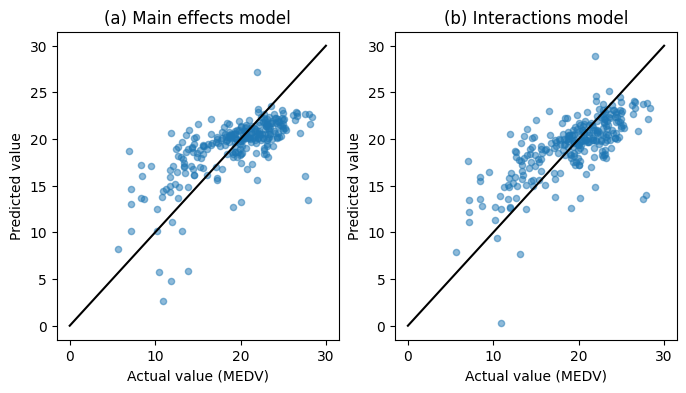

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=[8, 4])
df = pd.DataFrame({"Predicted value": model.fittedvalues,
                   "Actual value (MEDV)": housing["MEDV"]})
ax = df.plot.scatter(x="Actual value (MEDV)", y="Predicted value",
    alpha=0.5, ax=axes[0])
ax.set_title("(a) Main effects model")
ax.plot([0,30], [0,30], color="black")

df = pd.DataFrame({"Predicted value": model_interaction.fittedvalues,
                   "Actual value (MEDV)": housing["MEDV"]})
ax = df.plot.scatter(x="Actual value (MEDV)", y="Predicted value",
                     alpha=0.5, ax=axes[1])
ax.set_title("(b) Interactions model")
ax.plot([0,30], [0,30], color="black")
plt.show()

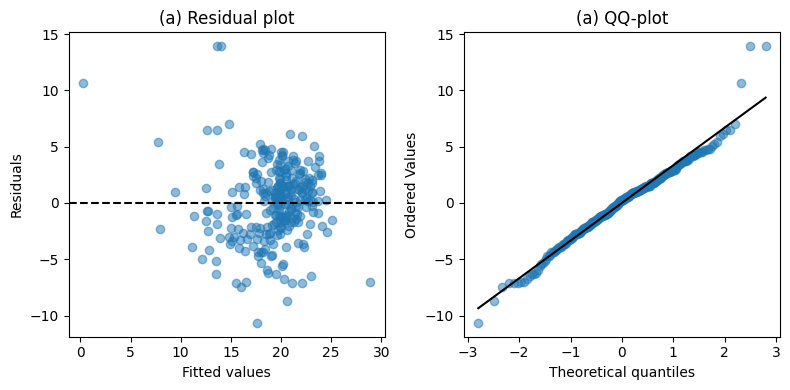

In [6]:
import scipy.stats as stats

fig, axes = plt.subplots(ncols=2, figsize=[8, 4])
ax = axes[0]
ax.scatter(model_interaction.fittedvalues, model_interaction.resid, alpha=0.5)
ax.axhline(0, color="black", linestyle="dashed")
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("(a) Residual plot")

ax = axes[1]
stats.probplot(model_interaction.resid, dist="norm", plot=ax)
ax.get_lines()[0].set_color("C0")
ax.get_lines()[0].set_alpha(0.5)
ax.get_lines()[1].set_color("black")
ax.set_title("(a) QQ-plot")
plt.tight_layout()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd

predictors = ["CRIM", "RM"]
outcome = "MEDV"
X = housing[predictors]
y = housing[outcome]
model = LinearRegression()
model.fit(X, y)
print(model.intercept_)
print(pd.Series(model.coef_, index=predictors))

2.5087716668939564
CRIM   -0.490372
RM      3.008263
dtype: float64


In [8]:
new_data = pd.DataFrame({"CRIM": [2, 10], "RM": [8, 7]})
predictions = model.predict(new_data)
print(predictions)

[25.59413421 18.66289324]


In [9]:
X["CRIM:RM"] = X["CRIM"] * X["RM"]
model_interaction = LinearRegression()
model_interaction.fit(X, y)
print(model_interaction.intercept_)
print(pd.Series(model_interaction.coef_, index=predictors + ["CRIM:RM"]))

-7.623594886934132
CRIM       1.246896
RM         4.679950
CRIM:RM   -0.291616
dtype: float64


In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

rng = np.random.default_rng(seed=321)

housing["RANDOM"] = rng.random(len(housing))
predictors = ["CRIM", "RM", "RANDOM"]
outcome = "MEDV"
X = housing[predictors]
y = housing[outcome]

model = LinearRegression()
model.fit(X, y)
actual = pd.Series([model.intercept_, *model.coef_],
                   index=["Intercept", *predictors])

resamples = []
for _ in range(1000):
    model.fit(X, rng.permutation(y))
    resamples.append((model.intercept_, *model.coef_))
resamples = pd.DataFrame(resamples, columns=["Intercept", *predictors])

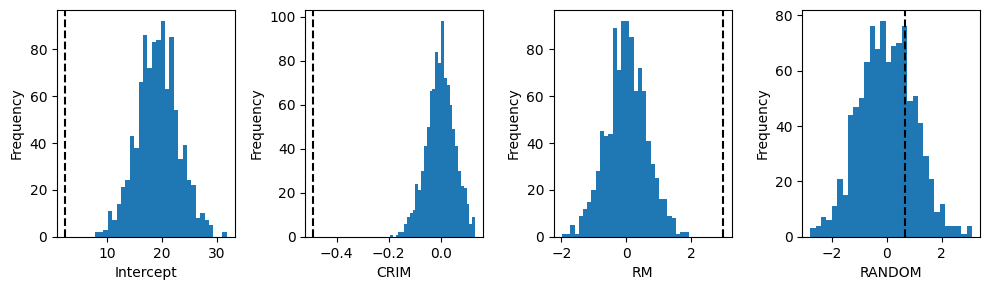

In [11]:
fig, axes = plt.subplots(ncols=4, figsize=[10, 3])
for ax, name in zip(axes, resamples.columns):
    resamples[name].plot.hist(bins=30, ax=ax)
    ax.axvline(actual[name], color="black", linestyle="dashed")
    ax.set_xlabel(name)
plt.tight_layout()
plt.show()

In [12]:
from numpy.random import RandomState
from sklearn.utils import resample

rng = np.random.RandomState(seed=321)
model = LinearRegression()
model.fit(X, y)
estimate = pd.Series([model.intercept_, *model.coef_],
                     index=["Intercept", *predictors])
coefficients = []
for _ in range(1000):
    X_resampled, y_resampled = resample(X, y, random_state=rng)
    model = LinearRegression()
    model.fit(X_resampled, y_resampled)
    coefficients.append([model.intercept_, *model.coef_])
coefficients = pd.DataFrame(coefficients, columns=estimate.index)

conf_intervals = pd.DataFrame({
    "Coefficient": estimate,
    "Lower": np.percentile(coefficients, 2.5, axis=0),
    "Upper": np.percentile(coefficients, 97.5, axis=0)
})
print(conf_intervals)

           Coefficient     Lower     Upper
Intercept     2.310490 -5.394596  8.763676
CRIM         -0.489569 -0.616600 -0.381332
RM            2.987768  1.972809  4.263446
RANDOM        0.646785 -0.819860  2.017485


In [13]:
formula = "MEDV ~ CRIM + RM + RANDOM"
model = smf.ols(formula, data=housing).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.445    
Dependent Variable: MEDV             AIC:                1433.2517
Date:               2024-02-24 10:14 BIC:                1447.6007
No. Observations:   267              Log-Likelihood:     -712.63  
Df Model:           3                F-statistic:        72.02    
Df Residuals:       263              Prob (F-statistic): 4.95e-34 
R-squared:          0.451            Scale:              12.370   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      2.3105    2.8325    0.8157  0.4154  -3.2668   7.8878
CRIM          -0.4896    0.0399  -12.2726  0.0000  -0.5681  -0.4110
RM             2.9878    0.4615    6.4744  0.0000   2.0791   3.8964
RANDOM         0.6468    0.7581    0.8532  0.3943  -0.8459   2.1395
------

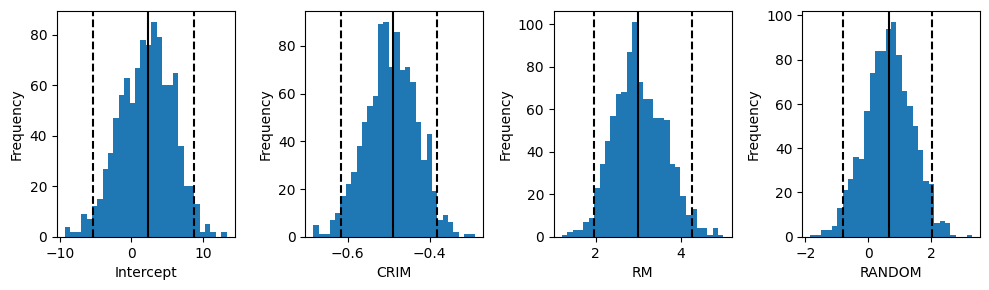

In [14]:
fig, axes = plt.subplots(ncols=4, figsize=[10, 3])
for ax, name in zip(axes, coefficients.columns):
    coefficients[name].plot.hist(bins=30, ax=ax)
    ax.axvline(actual[name], color="black")
    ax.axvline(conf_intervals.loc[name, "Lower"], color="black", linestyle="dashed")
    ax.axvline(conf_intervals.loc[name, "Upper"], color="black", linestyle="dashed")
    ax.set_xlabel(name)
plt.tight_layout()
plt.show()